In [4]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px    
import seaborn as sns

In [34]:


# Load data
Rent = pd.read_csv("Data/medianAskingRent_All.csv")

# Filter for Neighborhoods only
Rent = Rent[Rent['areaType'] == 'neighborhood']

# Reshape date columns into single column
Rent = Rent.melt(id_vars=["areaName", "Borough", "areaType"], 
                 var_name="Date", 
                 value_name="Price")

# Keep only dates from 2018 till 2025
Rent = Rent[(Rent['Date'] >= '2018-01-01') & (Rent['Date'] <= '2024-12-31')]


# Convert Date column to datetime
Rent['Date'] = pd.to_datetime(Rent['Date'], errors='coerce')


# Preview
Rent.head()


/var/folders/m4/bmh568p11rz8csxv3ngfg3rh0000gn/T/ipykernel_97282/3805052791.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Rent['Date'] = pd.to_datetime(Rent['Date'], errors='coerce')


,areaName,Borough,areaType,Date,Price
17169,Astoria,Queens,neighborhood,2018-02-01,2123.0
17170,Auburndale,Queens,neighborhood,2018-02-01,2300.0
17171,Bath Beach,Brooklyn,neighborhood,2018-02-01,1950.0
17172,Battery Park City,Manhattan,neighborhood,2018-02-01,4078.0
17173,Bay Ridge,Brooklyn,neighborhood,2018-02-01,1995.0


In [35]:
## calculate the average price in a month 

monthly = Rent.groupby(Rent['Date'])['Price'].mean()
monthly = monthly.reset_index()

## first group by borough and date 
borough = Rent.groupby(['Date','Borough'])['Price'].mean()
borough = borough.reset_index()
borough

,Date,Borough,Price
0,2018-02-01,Bronx,1756.000000
1,2018-02-01,Brooklyn,2369.023810
2,2018-02-01,Manhattan,3495.064516
3,2018-02-01,Queens,2007.840000
4,2018-03-01,Bronx,1747.823529
...,...,...,...
327,2024-11-01,Queens,2628.200000
328,2024-12-01,Bronx,2438.095238
329,2024-12-01,Brooklyn,3376.875000
330,2024-12-01,Manhattan,4765.000000


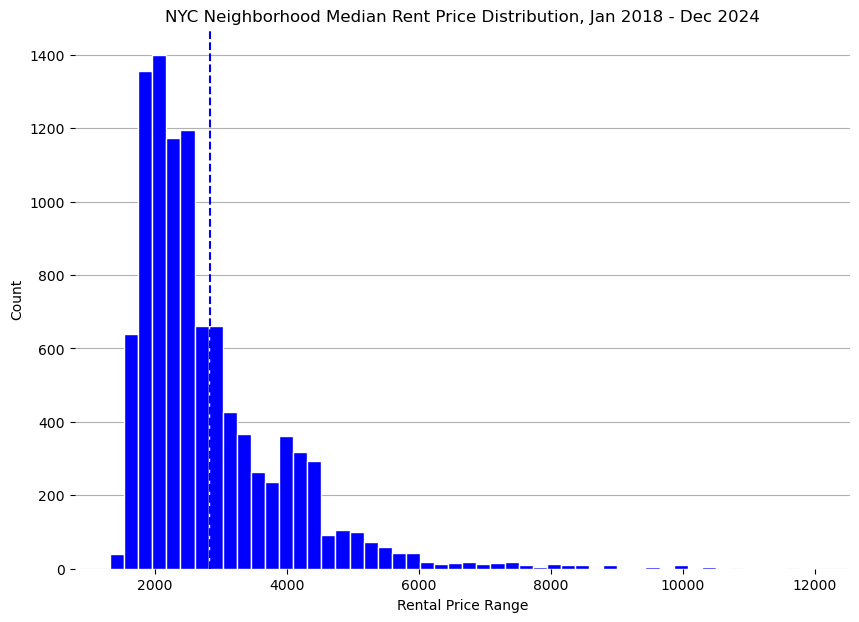

In [42]:
### distribution of the median rental pricing 

fig, ax = plt.subplots(figsize=(10, 7))    


ax.hist(Rent.Price, bins=50 , 
        color="blue", edgecolor='white')

ax.set(xlabel='Rental Price Range', ylabel='Count', title='NYC Neighborhood Median Rent Price Distribution, Jan 2018 - Dec 2024')

plt.axvline(Rent.Price.mean(), color='Blue', linestyle='dashed')

ax.grid(axis='y')           # show horizontal grid lines only
ax.set_axisbelow(True)      # show grid behind bins
plt.box(False)              # remove the frame

Text(0.5, 1.0, 'The Median Price Distribution in NYC  (by Borough Jan 2018 - Dec 2024')

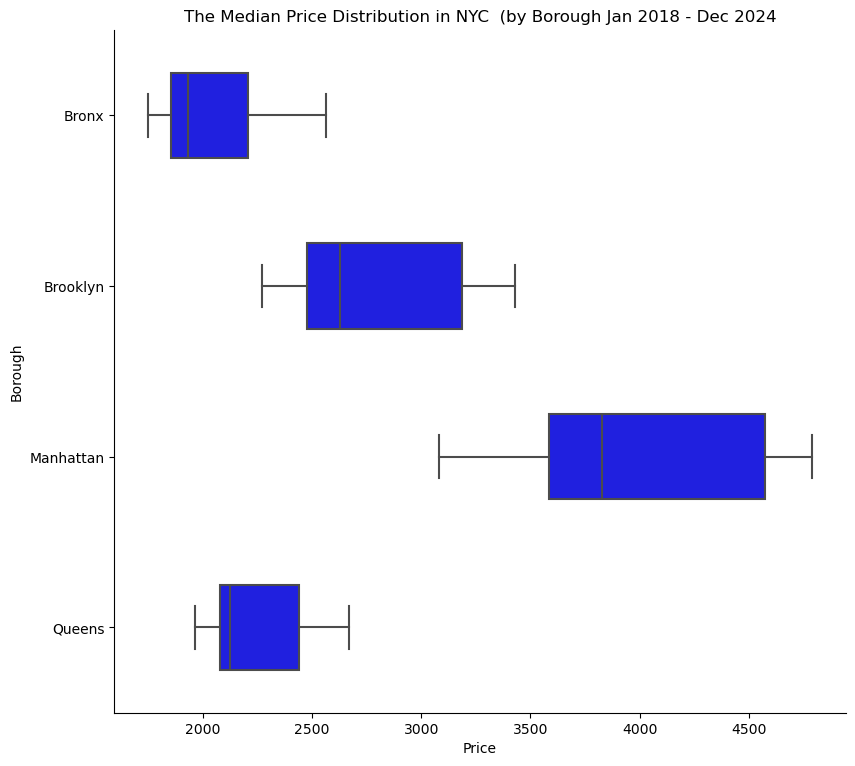

In [41]:
b = sns.catplot(x="Price", y="Borough", 
                color = 'blue',
                width=0.5,
                kind='box',
                data=borough)

b.fig.set_figwidth(10)
b.fig.set_figheight(8)  

plt.title('The Median Price Distribution in NYC  (by Borough Jan 2018 - Dec 2024')

Text(0.5, 1.0, 'The Median Price Distribution in NYC  (by Borough Jan 2018 - Dec 2024')

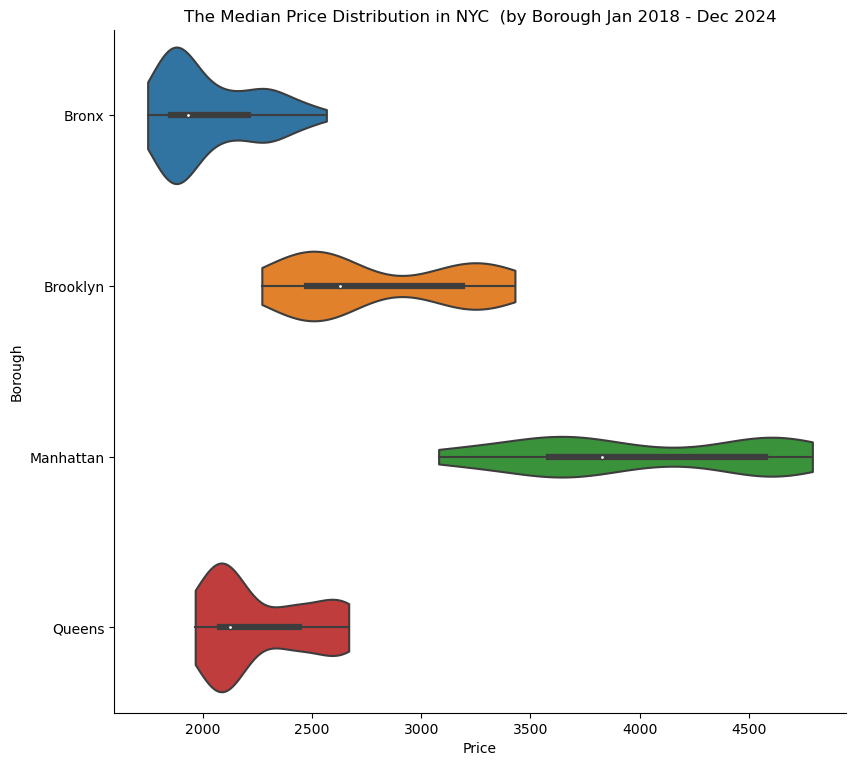

In [40]:
my_order = borough.groupby(by=["Borough"])["Price"].mean().iloc[::-1].index
my_order = my_order.sort_values()

k = sns.catplot(x= "Price", y="Borough", 
                kind= 'violin',
                cut= 0, hue_order=True,
                data= borough,
                order= my_order)

k.fig.set_figwidth(10)
k.fig.set_figheight(8)     

plt.title('The Median Price Distribution in NYC  (by Borough Jan 2018 - Dec 2024')

In [43]:
print(borough.groupby(by=["Borough"])["Price"].mean())


Borough
Bronx        2026.326100
Brooklyn     2795.271182
Manhattan    4005.405221
Queens       2255.771305
Name: Price, dtype: float64


In [44]:
std_price = borough.groupby(by=["Borough"])["Price"].std()
std_price

Borough
Bronx        213.514126
Brooklyn     384.585716
Manhattan    544.624047
Queens       234.275778
Name: Price, dtype: float64

I utilized violin plots, boxplots, and histograms. From the initial visualizations, it's evident that the rental price distribution is not normally distributed, indicating skewness likely driven by extreme values in high-end neighborhoods.

A major contributor to the disparity in average rental prices appears to be luxury or premium neighborhoods, which inflate the upper end of the price spectrum — this is particularly visible in the Manhattan area.

Analyzing the standard deviation (std) of rental prices by borough helps quantify this variability:

Bronx: Std = $213 → Rent prices are relatively stable, with low variation across neighborhoods.

Queens: Std = $234 → Slightly more varied than the Bronx but still maintains a relatively consistent rental market.

Brooklyn: Std = $384 → Shows moderate price volatility, reflecting a more diverse housing market.

Manhattan: Std = $544 → shows    the   highest   variability  in   rental prices. A standard deviation of $548 means that prices typically deviate by $548 from the mean, indicating a wide range of rental options, from lower-cost apartments to luxury listings.

The standard deviation reinforces the visual findings: Manhattan's rental market is the most volatile and diverse, while the Bronx and Queens are more uniform in price distribution.

Examining Trends of Median Pricing through Time Series


<Figure size 1280x960 with 0 Axes>

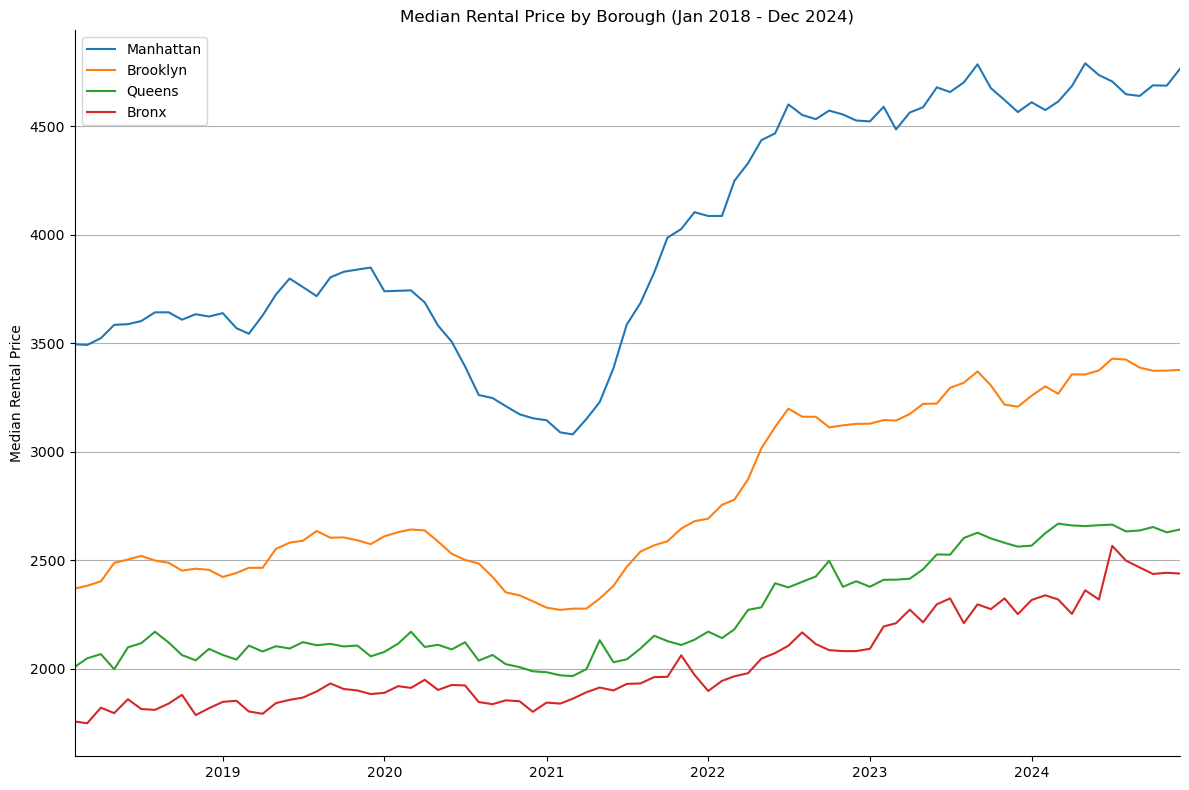

In [45]:

# ✅ Filter for the 4 boroughs
selected_boroughs = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx']
filtered = borough[borough['Borough'].isin(selected_boroughs)]

# ✅ Create the plot
plt.figure(dpi=200)

fig, ax = plt.subplots(figsize=(12, 8))

# Plot each borough's time series
for b in selected_boroughs:
    subset = filtered[filtered['Borough'] == b]
    ax.plot(subset['Date'], subset['Price'], label=b)

# 🧼 Clean up
ax.set_xlim(filtered['Date'].min(), filtered['Date'].max())
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y')
ax.set_axisbelow(True)

# 🏷️ Labels & Title
ax.set_ylabel('Median Rental Price')
ax.set_title('Median Rental Price by Borough (Jan 2018 - Dec 2024)')
ax.legend()

plt.tight_layout()
plt.show()


<Figure size 1920x1080 with 0 Axes>

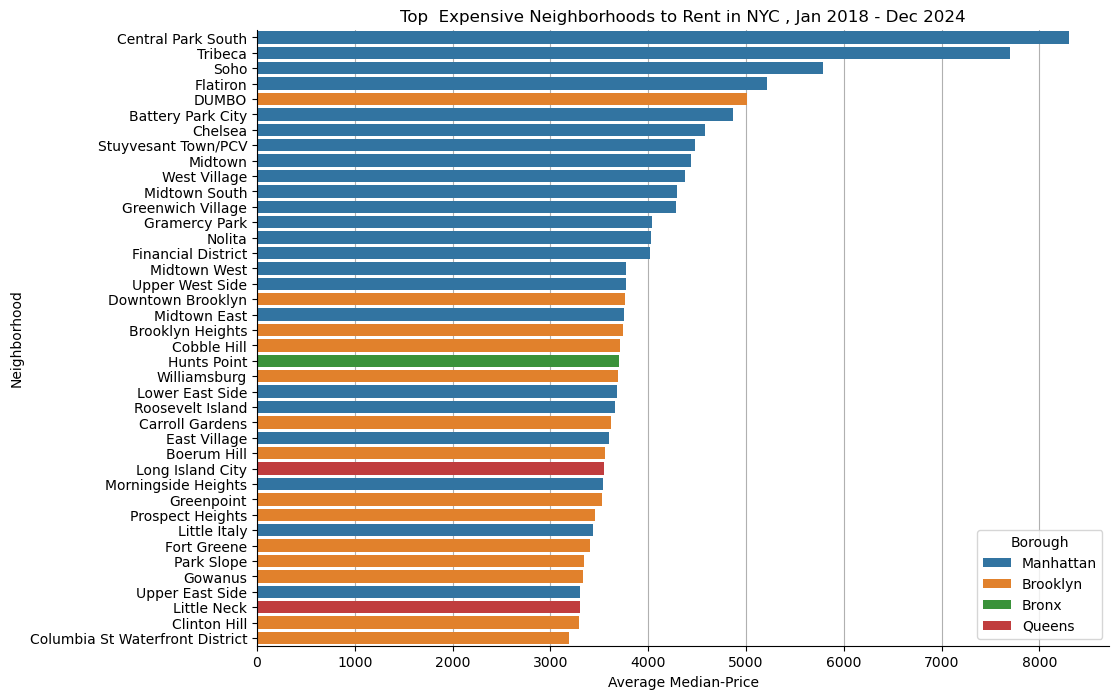

In [47]:
### Horizontal Plot of the most expensive neighborhoods 

#first group by neighborhood & compute mean price for each area
nhood = Rent.groupby(['areaName','Borough'])['Price'].mean().reset_index()

#next filter for the top  neighborhoods
tophoods = nhood.nlargest(40,'Price')
#lastly sort by highest to lowest
tophoods = tophoods.sort_values(by = 'Price', ascending=False)
tophoods

# horizontal bar chart
fig = plt.figure(figsize=(19.20,10.80))
fig, ax = plt.subplots(figsize=(11, 8))        

sns.barplot(y='areaName', x="Price", hue="Borough", data=tophoods,dodge=False) 

ax.spines['top'].set_visible(False)                    # remove top border
ax.spines['right'].set_visible(False)                  # remove right border

ax.set(xlabel = 'Average Median-Price', ylabel='Neighborhood', 
      title = 'Top  Expensive Neighborhoods to Rent in NYC , Jan 2018 - Dec 2024') 

ax.grid(axis='x')                                      # show horizontal grid lines only
ax.set_axisbelow(True)                                 # show grid behind shape

In this section, we're still looking at the average median rental price but we have a horizontal bar chart representing the most expensive neighborhoods to rent in NYC.
This plot allows us to clearly see what are the most expensive neighborhoods. From this, we see that the majority of the most expensive neighborhoods are Cental park South, Tribeca, Soho, Flatiron, Dumbo, Battery park city, chelsa, Midtown, West village. If you're going to want to live in the top expensive neighborhoods in Manhattan, expect to pay at least on average $4 000 for rent.

In [48]:
 #Convert 'Date' column to datetime format
Rent['Date'] = pd.to_datetime(Rent['Date'])

# Extract year from 'Date' column
Rent['Year'] = Rent['Date'].dt.year

# Group data by 'areaName' and 'Year', then calculate the mean price
annual_average_price_by_area = Rent.groupby(['areaName', 'Year'])['Price'].mean()

# Reset index to make 'areaName' and 'Year' columns regular columns
annual_average_price_by_area = annual_average_price_by_area.reset_index()

# Print the result
annual_average_prices = Rent.groupby(['areaName','Year'])['Price'].mean().reset_index()

annual_average_prices

,areaName,Year,Price
0,Astoria,2018,2181.272727
1,Astoria,2019,2280.583333
2,Astoria,2020,2193.000000
3,Astoria,2021,2077.000000
4,Astoria,2022,2535.083333
...,...,...,...
1234,Woodstock,2020,1904.555556
1235,Woodstock,2021,1800.583333
1236,Woodstock,2022,1910.000000
1237,Woodstock,2023,2357.875000


In [50]:
annual_average_prices
top_ten=annual_average_prices[annual_average_prices['Year']==2022].sort_values('Price', ascending=False).reset_index(drop=True).loc[0:11,'areaName']
top_ten

0      Central Park South
1                 Tribeca
2                    Soho
3                Flatiron
4                   DUMBO
5       Battery Park City
6                 Chelsea
7                 Midtown
8     Stuyvesant Town/PCV
9            West Village
10          Midtown South
11      Greenwich Village
Name: areaName, dtype: object

In [30]:
tophoods


,areaName,Borough,Price
27,Central Park South,Manhattan,8301.655172
158,Tribeca,Manhattan,7691.379310
146,Soho,Manhattan,5829.574713
60,Flatiron,Manhattan,5238.505747
44,DUMBO,Brooklyn,5022.689655
3,Battery Park City,Manhattan,4856.965517
28,Chelsea,Manhattan,4602.494253
153,Stuyvesant Town/PCV,Manhattan,4506.068966
105,Midtown,Manhattan,4446.183908
167,West Village,Manhattan,4408.528736


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


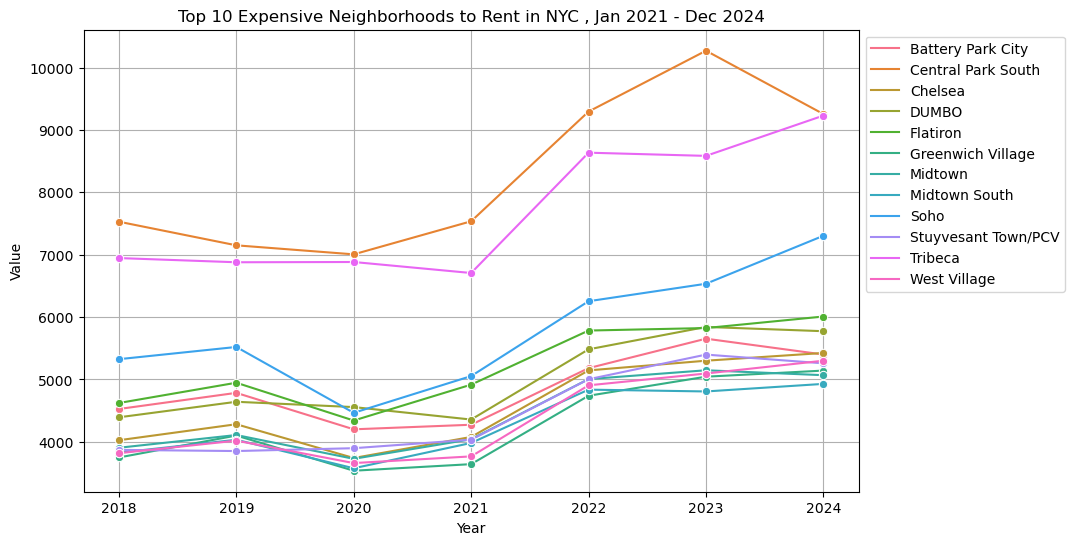

In [53]:
# Filter for the top 5 expensive neighborhoods
tophoods = annual_average_prices[annual_average_prices['areaName'].isin(top_ten)]

# Create a plot for each area
# Set the size of the figure
plt.figure(figsize=(10, 6))
# Create a line plot
sns.lineplot(data=tophoods, x='Year', y='Price', hue='areaName', marker='o', style='areaName', dashes=False)
# Adding plot title and labels
plt.title('Top 10 Expensive Neighborhoods to Rent in NYC , Jan 2021 - Dec 2024')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside the plot area

plt.grid(True)  # Optional: Add grid for better readability
# Display the plot
plt.show()